# import important liberaries

In [131]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data=pd.read_csv(r"D:\projectatyyyyy\train_2v.csv")

In [133]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [134]:
print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
print(data.duplicated().sum())

Number of duplicate values :
0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [136]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [137]:
abnormal_age=data.age[data.age<1]
print('length of abnormal_age: ',len(abnormal_age))

length of abnormal_age:  496


In [138]:
for col in data.columns:
    print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(data[col].unique()))

Unique values in id : 43400
Unique values in gender : 3
Unique values in age : 104
Unique values in hypertension : 2
Unique values in heart_disease : 2
Unique values in ever_married : 2
Unique values in work_type : 5
Unique values in Residence_type : 2
Unique values in avg_glucose_level : 12543
Unique values in bmi : 556
Unique values in smoking_status : 4
Unique values in stroke : 2


In [139]:
data=data.drop(columns=["id"])

In [140]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([mis_val, mis_val_percent], axis=1)

        col_names = table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        col_names= col_names[col_names.iloc[:,1] != 0].sort_values('% of Total Values',
                                                                   ascending=False).round(1)
        
        print ("Dataframe has " + str(df.shape[1]) + " columns,"      
            "And there exist " + str(col_names.shape[0]) +
              " columns missing value(s)")
        
        return col_names
    
summary=missing_values_table(data)
summary

Dataframe has 11 columns,And there exist 2 columns missing value(s)


,Missing Values,% of Total Values
smoking_status,13292,30.6
bmi,1462,3.4


D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

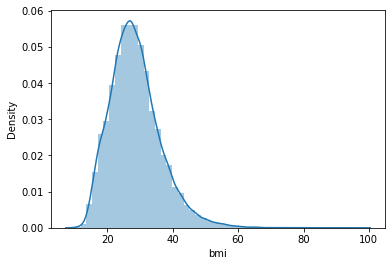

In [141]:
sns.distplot(data.bmi)

## data processing

In [142]:
data["bmi"]=data["bmi"].fillna(data["bmi"].median())
data["bmi"].isnull().sum()

0

In [143]:
unique_col=["gender","work_type","smoking_status"]
for col in unique_col :
    print('\nValues are -> ',data[col].unique())


Values are ->  ['Male' 'Female' 'Other']

Values are ->  ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']

Values are ->  [nan 'never smoked' 'formerly smoked' 'smokes']


In [144]:
data["smoking_status"].replace([data.smoking_status[data["age"]<10]],"never smoked" ,inplace =True)

In [145]:
summary=missing_values_table(data)
summary

Dataframe has 11 columns,And there exist 0 columns missing value(s)


,Missing Values,% of Total Values


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# encode data

In [147]:
from sklearn.preprocessing import LabelEncoder
encoded_data=data.apply(LabelEncoder().fit_transform)
encoded_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,24,0,0,0,4,0,3984,74,1,0
1,1,79,1,0,1,2,1,3268,286,1,0
2,0,29,0,0,0,2,1,5544,70,1,0
3,0,91,0,0,1,2,0,1378,253,0,0
4,1,35,0,0,0,1,0,8677,85,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,31,0,0,0,4,1,354,98,1,0
43396,0,77,0,0,1,0,1,10967,448,0,0
43397,0,103,1,0,1,2,1,3666,183,0,0
43398,1,61,0,0,1,2,1,4388,226,1,0


## correlation matrix

<AxesSubplot:>

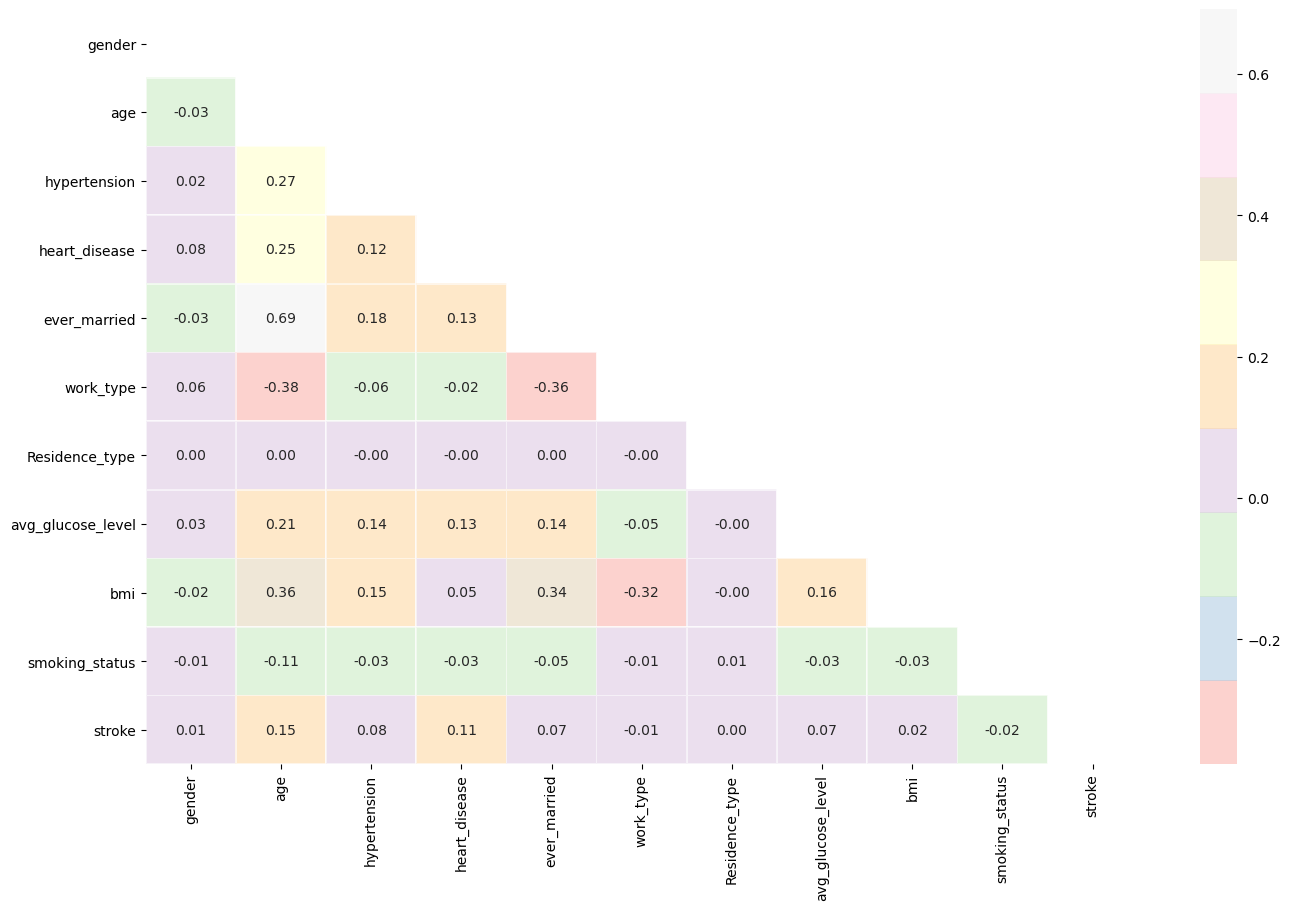

In [148]:

plt.figure(figsize = (16, 10), dpi = 100)

corr = encoded_data.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, mask = mask , cmap = 'Pastel1', annot = True , linewidths = 0.5 , fmt = ".2f" , alpha = 0.6)

In [149]:
df=encoded_data.copy()
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [150]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (34720, 10)
y_train dataset:  (34720,)
X_test dataset:  (8680, 10)
y_test dataset:  (8680,)


In [151]:
#print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#sm = SMOTE(random_state=2)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#X, y = sm.fit_resample(X, y)


#print('After OverSampling, the shape of train_X: {}'.format(X.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

In [152]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_params= param_dist={
   "criterion":['gini', 'entropy', 'log_loss'],
   "max_depth":[0,7,8,9,10,None],
    'splitter':['best', 'random'],
    #'max_features':[4,5,'auto', 'sqrt', 'log2'],
    'random_state':[4,5,6,7,8,9,None],
    #'max_leaf_nodes':[5,6,7,8,9,None],
    'class_weight': [{0:x, 1:1.0-x} for x in weights]
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 3)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Training set score: {round(tree_grid.score(X_train, y_train) * 100, 2)}%')
print ('--')
print ('Testing set Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

In [155]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=5, splitter ='random',class_weight='balanced')

clf_en.fit(X_train, y_train)
 
y_pred_en = clf_en.predict(X_test)

In [156]:
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

Test set score: 0.7210
Training set score: 0.7227
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      8547
           1       0.04      0.82      0.08       133

    accuracy                           0.72      8680
   macro avg       0.52      0.77      0.46      8680
weighted avg       0.98      0.72      0.82      8680



Confusion Matrix : 


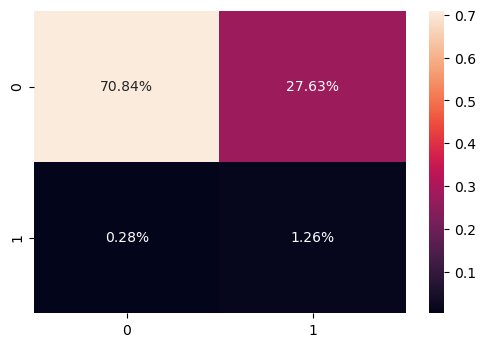

In [157]:
cm = confusion_matrix(y_test,y_pred_en)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.show()

In [ ]:
'''
random_grid={'n_estimators':[5,20,50,100],
'max_features':["auto",'sqrt'],
'max_depth':[int(x) for x in np.linspace(10,120,num=12)],
'min_samples_split':[2,6,10],
'min_samples_leaf':[1,3,4],
'bootstrap':[True,False]
#'class_weight': [{0:x, 1:1.0-x} for x in weights]
            }

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_estimator_
y_pred = rf_random.predict(X_test)
best_score = rf_random.best_score_
best_params = rf_random.best_params_
#precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)

print(f'Training set score: {round(tree_grid.score(X_train, y_train) * 100, 2)}%')
print ('--')
print ('Testing set Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)'''

In [158]:
randmf = RandomForestClassifier(n_estimators=20,min_samples_split= 10,min_samples_leaf= 4,
                                max_features= 'sqrt',max_depth= 10,bootstrap= True,class_weight={0:0.1,1:70})
randmf.fit( X_train, y_train) 
y_pred_rf=randmf.predict(X_test)

In [159]:
print('Test set score: {:.4f}'.format(randmf.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(randmf.score(X_train, y_train)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

Test set score: 0.5111
Training set score: 0.5160
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      8547
           1       0.03      0.91      0.05       133

    accuracy                           0.51      8680
   macro avg       0.51      0.71      0.36      8680
weighted avg       0.98      0.51      0.66      8680



Confusion Matrix : 


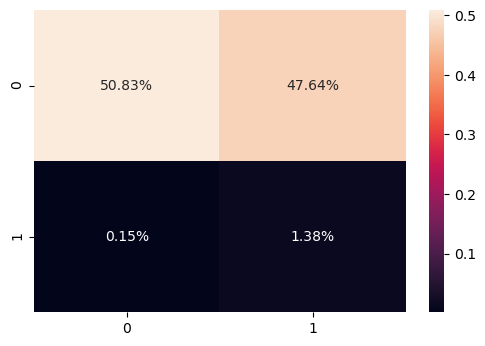

In [130]:
cm = confusion_matrix(y_test,y_pred_rf)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.show()

# LogisticRegression

In [73]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

Test set score: 0.7409
Training set score: 0.7373
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8547
           1       0.05      0.81      0.09       133

    accuracy                           0.74      8680
   macro avg       0.52      0.78      0.47      8680
weighted avg       0.98      0.74      0.84      8680



Confusion Matrix : 


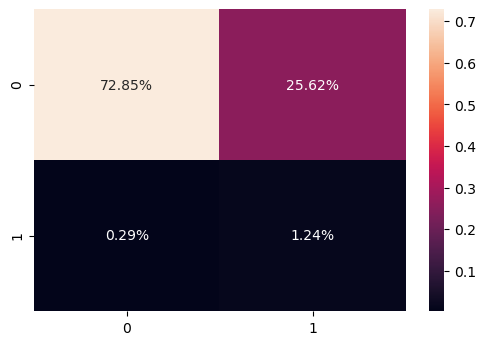

In [75]:
cm = confusion_matrix(y_test,pred_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.show()

# KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
  
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
y_pred = knn.predict(X_test)

In [117]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.46774193548387 % and k = [6, 10, 11, 12, 13, 14]


In [ ]:
knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)*100

In [76]:
'''from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Set the range of class weights
weights = np.linspace(0.0,0.99,200)

#Create dictionary grid for grid search
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    'class_weight': [{0:x, 1:1.0-x} for x in weights]
    }]
##Fitting training data with 5 times grid search method
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2).fit(X_train, y_train)

#Draw fractions with different weight values
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('recall')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)'''

"from sklearn.model_selection import GridSearchCV, StratifiedKFold\nlr = LogisticRegression(solver='newton-cg')\n\n#Set the range of class weights\nweights = np.linspace(0.0,0.99,200)\n\n#Create dictionary grid for grid search\nparam_grid = [    \n    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\n    'C' : np.logspace(-4, 4, 20),\n    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],\n    'max_iter' : [100, 1000,2500, 5000],\n    'class_weight': [{0:x, 1:1.0-x} for x in weights]\n    }]\n##Fitting training data with 5 times grid search method\ngridsearch = GridSearchCV(estimator= lr, \n                          param_grid= param_grid,\n                          cv=StratifiedKFold(), \n                          n_jobs=-1, \n                          scoring='recall', \n                          verbose=2).fit(X_train, y_train)\n\n#Draw fractions with different weight values\nsns.set_style('whitegrid')\nplt.figure(figsize=(12,8))\nweigh_data = pd.DataFrame({ 'score': gridsea

In [44]:
'''param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

log_clf= GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
log_clf.fit(X_train, y_train)
log_clf.best_estimator_
y_pred = log_clf.predict(X_test)
best_score = log_clf.best_score_
best_params = log_clf.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Training set score: {round(log_clf.score(X_train, y_train) * 100, 2)}%')
print ('--')
print ('Testing set Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)'''

"param_grid = [    \n    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\n    'C' : np.logspace(-4, 4, 20),\n    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],\n    'max_iter' : [100, 1000,2500, 5000]\n    }\n]\n\nlog_clf= GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)\nlog_clf.fit(X_train, y_train)\nlog_clf.best_estimator_\ny_pred = log_clf.predict(X_test)\nbest_score = log_clf.best_score_\nbest_params = log_clf.best_params_\nprecision = precision_score(y_test, y_pred)\nroc = roc_auc_score(y_test, y_pred)\nrecall = recall_score(y_test, y_pred)\ncm = confusion_matrix(y_test, y_pred)\n\n\nprint(f'Training set score: {round(log_clf.score(X_train, y_train) * 100, 2)}%')\nprint ('--')\nprint ('Testing set Score is',best_score * 100)\nprint ('--')\nprint ('Best Parameters is', best_params)\nprint ('--')\nprint ('ROC Score is', roc)\nprint ('--')\nprint ('Recall Score is ', recall)\nprint ('--')\nprint ('Confusion Matrix\n\n', cm)"

In [74]:
## need the parameter
'''logistic_base_model = LogisticRegression(C=1e9,class_weight={0:1,1:52})

logistic_base_model.fit(X_train,y_train)

y_pred_logistic_base_model = logistic_base_model.predict(X_test)'''

'logistic_base_model = LogisticRegression(C=1e9,class_weight={0:1,1:52})\n\nlogistic_base_model.fit(X_train,y_train)\n\ny_pred_logistic_base_model = logistic_base_model.predict(X_test)'

In [160]:
'''print('Test set score: {:.4f}'.format(logistic_base_model.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(logistic_base_model.score(X_train, y_train)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_base_model))'''

"print('Test set score: {:.4f}'.format(logistic_base_model.score(X_test, y_test)))\nprint('Training set score: {:.4f}'.format(logistic_base_model.score(X_train, y_train)))\nfrom sklearn.metrics import classification_report\nprint(classification_report(y_test, y_pred_logistic_base_model))"